In [1]:
import control as ctrl
import matplotlib.pyplot as plt
import numpy as np

# You can use this command to show the image in a pop up window, just uncomment the line below
# %matplotlib qt

In [2]:
def fz_eq(fc_desired, theta):
    num = 1 - np.sin(theta)
    den = 1 + np.sin(theta)

    return fc_desired * np.sqrt(num/den)


def fl_eq(fc_desired, theta):
    num = 1 + np.sin(theta)
    den = 1 - np.sin(theta)

    return fc_desired * np.sqrt(num/den)


def w_eq(f):
    return 2*np.pi*f


def deg_to_radians(deg):
    return deg/180*np.pi


def radians_to_deg(radius):
    return radius/np.pi*180

In [3]:
Vg = 28
L = 50e-6
C = 500e-6
R = 3
fs = 100e3

H = 1/3
Vm = 4
Vo = 15

theta = deg_to_radians(60)
fc = 10e3

In [4]:
s = ctrl.tf([1, 0], [1])
Gvd = Vg * (1/L/C) / (s**2 + s/R/C + 1/L/C)
T = Gvd * H / Vm

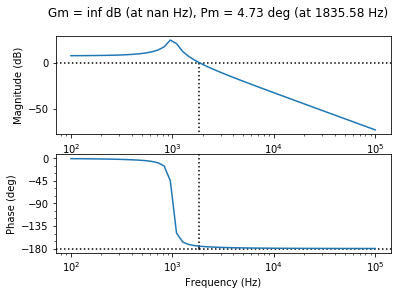

In [5]:
_,_,_ = ctrl.bode(T, Hz=True, dB=True, margins=True)

In [6]:
sin_theta_plus = 1 + np.sin(theta)
sin_theta_minus = 1 - np.sin(theta)

fz = fz_eq(fc, theta); print('fz', fz)
fp = fl_eq(fc, theta); print('fp', fp)

fl = fc/10; print('fl', fl)

print('\n')

wz = 2 * fz * np.pi; print('wz', wz)
wp = 2 * fp * np.pi; print('wp', wp)
wl = 2 * fl * np.pi; print('wl', wl)

fz 2679.4919243112276
fp 37320.50807568876
fl 1000.0


wz 16835.744289538663
wp 234491.66799764472
wl 6283.185307179586


In [7]:
Cpid = (s + wz)*(s + wl) / s / (s + wp)
T = Cpid * Gvd * H / Vm

c:\users\tiarles\appdata\local\programs\python\python37\lib\site-packages\scipy\sparse\linalg\matfuncs.py:716: LinAlgWarning: Ill-conditioned matrix (rcond=5.9542e-20): result may not be accurate.
  return solve(Q, P)


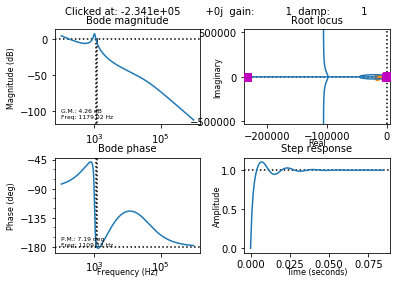

In [8]:
plt.clf()
ctrl.sisotool(T, Hz=True, dB=True, omega_num=10000)

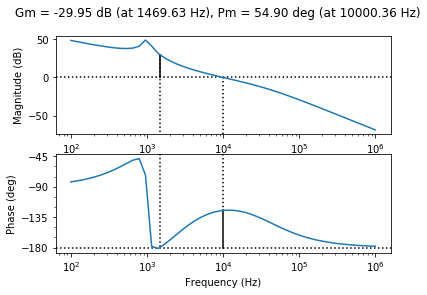

In [9]:
Cpid_adjust = 155.5 * Cpid
T = Cpid_adjust * Gvd * H / Vm

plt.clf()
_,_,_ = ctrl.bode(T, Hz=True, dB=True, margins=True)